In [1]:
import numpy as np
import cv2
import os
import random
import math
import time
import matplotlib.pyplot as plt

https://drive.google.com/drive/folders/1UftggqMYPfiYwI8Fbkj2oYLsV2IexVGi?usp=drive_link

In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#replace the path with the aimed folder (by duplicate the path from the left box)
os.chdir('/content/drive/Shareddrives/SmartCLT_DF2023/Scan2/GOOD_SCAN')

Mounted at /content/drive


In [3]:
idlist = list(range(1,33))

**Task 0: Fetch Images and Prepare for Processing**

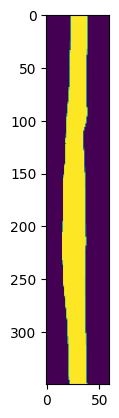

In [23]:
imageset = []
imageset_highres=[]
for i in idlist:
  image = cv2.imread(str(i).zfill(2)+'_mask.jpg')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255
  imageset_highres.append(image)
  image = cv2.resize(image, (image.shape[1]//10, image.shape[0]//10)) #downsize the image now for faster processing
  imageset.append(image)
  plt.imshow(image)

**Task 1: Align Two Images, Find Loss**

In [24]:
def align_linear(image1, image2,addshift=0):

  zeros_column = np.zeros((image2.shape[0], image2.shape[1]))
  image_template = np.concatenate((zeros_column, image2), axis=1)
  image_width = image2.shape[1]


  loss_list = []
  values_0 = 1 # assign some value higher than zero
  image_shift = 0

  while values_0>0 and image_shift < image1.shape[0]:

    image_center1 = int(image1.shape[1]/2+image_shift)
    image_center2 = int(image1.shape[1]+image2.shape[1]/2)
    image_overlay1 = np.copy(image_template)
    image_overlay1[:, image_shift:image_shift+image_width] = image_overlay1[:, image_shift:image_shift+image_width]+image1
    between_region = image_overlay1[:,image_center1:image_center2]

    values_0 = np.sum(between_region == 0)
    values_2 = np.sum(between_region == 2)
    image_shift= image_shift + 1


  min_loss = values_2
  optimum_shift = image_shift+addshift
  image_overlay1 = np.copy(image_template)
  image_overlay1[:, optimum_shift:optimum_shift+image_width] = image_overlay1[:, optimum_shift:optimum_shift+image_width]+image1

  return min_loss, optimum_shift, image_overlay1

In [25]:
def visualize_solution(imageset, solution):
      order_list = solution[0]
      orientations_list = solution[1]
      rotations_list=solution[2]

      # rearrange images

      pairs = zip(imageset, order_list)
      sorted_pairs = sorted(pairs, key=lambda x: x[1])
      imageset_ordered = [pair[0] for pair in sorted_pairs]

      for i in range(len(orientations_list)):
        if orientations_list[i]==-1:
          imageset_ordered[i] = cv2.flip(imageset_ordered[i], 0)

      for i in range(len(rotations_list)):
        if rotations_list[i]==-1:
          imageset_ordered[i] = cv2.rotate(imageset_ordered[i],rotateCode=cv2.ROTATE_180)


      # compute a list of optimum shifts

      optimum_shifts = []
      optimum_shifts_running_value=0

      final_image = np.zeros([imageset_ordered[0].shape[0],imageset_ordered[0].shape[1]*len(imageset_ordered)])

      for i in range(len(imageset_ordered)-1):
        min_loss, optimum_shift, image_overlay1 = align_linear(imageset_ordered[i], imageset_ordered[i+1])
        optimum_shifts.append(optimum_shift)

      for i in range(len(imageset_ordered)):
        image_width = imageset_ordered[0].shape[1]
        basic_shift = image_width*i
        shift = sum(optimum_shifts[i:]) + basic_shift
        final_image[:, shift:shift+image_width] = final_image[:, shift:shift+image_width]+imageset_ordered[i]

      return final_image


In [7]:
def visualize_solution2(imageset, solution):
      order_list = solution[0]
      orientations_list = solution[1]

      # rearrange images

      pairs = zip(imageset, order_list)
      sorted_pairs = sorted(pairs, key=lambda x: x[1])
      imageset_ordered = [pair[0] for pair in sorted_pairs]

      for i in range(len(orientations_list)):
        if orientations_list[i]==-1:
          imageset_ordered[i] = cv2.flip(imageset_ordered[i], -1)


      # compute a list of optimum shifts

      optimum_shifts = []
      optimum_shifts_running_value=0

      min_loss, optimum_shift, image_overlay1 = align_linear(imageset_ordered[0], imageset_ordered[1])
      current_axes = plt.axes()
      current_axes.get_xaxis().set_visible(False)
      current_axes.get_yaxis().set_visible(False)
      plt.imshow(image_overlay1,cmap="gray")
      plt.savefig("0.png",format="png",dpi=300)

      for i in range(len(imageset_ordered)-1):
        min_loss, optimum_shift, image_overlay1 = align_linear(imageset_ordered[i], imageset_ordered[i+1])
        m=str(i)
        current_axes = plt.axes()
        current_axes.get_xaxis().set_visible(False)
        current_axes.get_yaxis().set_visible(False)
        plt.imshow(image_overlay1,cmap="gray")
        plt.savefig(m+".png",format="png",dpi=300)

      return 0


In [26]:
start_time = time.time()  # Record the start time
min_loss, optimum_shift, image_overlay1 = align_linear(imageset[0], imageset[1])
end_time = time.time()  # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", str(elapsed_time)[0:5], "seconds")

Elapsed time: 0.012 seconds


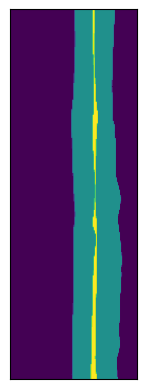

In [27]:
current_axes = plt.axes()
current_axes.get_xaxis().set_visible(False)
current_axes.get_yaxis().set_visible(False)
plt.imshow(image_overlay1)
plt.savefig("a.png",format="png")

In [28]:
def randomBoard (num=33):
  num = len(idlist)
  zuzu=[1 for i in range(num)]
  susu=[1 for i in range(num)]
  cucu=[0 for i in range(num)]
  for i in range(num):
    cucu[i]=i
  for i in range(num):
    zuzu[i]=random.choice([1, -1])
  for i in range(num):
    susu[i]=random.choice([1, -1])

  random.shuffle(cucu)
  random.shuffle(zuzu)
  random.shuffle(susu)
  return cucu, zuzu, susu

cucu, zuzu, susu = randomBoard ()

In [29]:
def swap_orientations(solution):
  order_list = solution[0]
  orientations_list = solution[1]
  rotations_list=solution[2]
  selected_index = random.randint(0, len(rotations_list) - 1)
  rotations_list[selected_index] *= -1
  return order_list, orientations_list, rotations_list

def swap_rotations(solution):
  order_list = solution[0]
  orientations_list = solution[1]
  rotations_list=solution[2]
  selected_index = random.randint(0, len(orientations_list) - 1)
  orientations_list[selected_index] *= -1
  return order_list, orientations_list, rotations_list

def swap_orders(solution):
  order_list = solution[0]
  orientations_list = solution[1]
  rotations_list=solution[2]
  index1, index2 = random.sample(range(len(order_list)), 2)
  order_list[index1], order_list[index2] = order_list[index2], order_list[index1]
  return order_list, orientations_list, rotations_list

order_list, orientations_list, rotations_list = swap_orientations([cucu, zuzu,susu])
order_list, orientations_list, rotations_list


def generate_neighbor(solution):
# Randomly choose between operation 1 and operation 2
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)

  ###
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)
  chosen_operation = random.choice([swap_orders, swap_orientations,swap_rotations])
  order_list, orientations_list,rotations_list = chosen_operation(solution)

  return solution

In [30]:
start_time = time.time()  # Record the start time
# cucu1=cucu
# a=cucu1[2]
# cucu1[2]=cucu1[1]
# cucu1[1]=a
[order_list, orientations_list,rotations_list] = generate_neighbor([cucu, zuzu,susu])
print(order_list, orientations_list,rotations_list)
end_time = time.time()  # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", str(elapsed_time)[0:5], "seconds")

[13, 1, 5, 30, 8, 27, 12, 11, 19, 16, 0, 17, 18, 26, 24, 22, 31, 23, 2, 25, 15, 6, 9, 14, 28, 29, 21, 10, 20, 7, 4, 3] [-1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1] [1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1]
Elapsed time: 0.001 seconds


In [31]:
def objective_function(solution):

    order_list = solution[0]
    orientations_list = solution[1]
    rotations_list=solution[2]

    # rearrange images

    pairs = zip(imageset, order_list)
    sorted_pairs = sorted(pairs, key=lambda x: x[1])
    imageset_ordered = [pair[0] for pair in sorted_pairs]

    for i in range(len(orientations_list)):
      if orientations_list[i]==-1:
        imageset_ordered[i] = cv2.flip(imageset_ordered[i], 0)

    for i in range(len(rotations_list)):
      if rotations_list[i]==-1:
        imageset_ordered[i] = cv2.rotate(imageset_ordered[i],rotateCode=cv2.ROTATE_180)

    # compute total loss
    total_loss = 0
    for j in range(len(imageset_ordered)-1):
      min_loss, optimum_shift, image_overlay1 = align_linear(imageset_ordered[j], imageset_ordered[j+1])
      #print(min_loss, optimum_shift, image_overlay1)
      total_loss = total_loss + optimum_shift



    return total_loss

In [32]:
start_time = time.time()  # Record the start time
total_loss = objective_function([cucu, zuzu,susu])
print(total_loss)
print(order_list, orientations_list,rotations_list)
end_time = time.time()  # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", str(elapsed_time)[0:5], "seconds")

1161
[13, 1, 5, 30, 8, 27, 12, 11, 19, 16, 0, 17, 18, 26, 24, 22, 31, 23, 2, 25, 15, 6, 9, 14, 28, 29, 21, 10, 20, 7, 4, 3] [-1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1] [1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1]
Elapsed time: 0.241 seconds


In [33]:
def acceptance_probability(current_cost, new_cost, temperature):
    # Calculates the acceptance probability based on the cost difference and temperature
    if new_cost < current_cost:
        return 1.0
    else:
        return math.exp((current_cost - new_cost) / temperature)

def simulated_annealing(initial_solution, initial_temperature, cooling_rate, num_iterations):
    current_cost_list = []
    best_cost_list = []
    current_solution = initial_solution
    initial_loss = objective_function(initial_solution)
    best_solution = current_solution
    current_cost = objective_function(current_solution)
    best_cost = current_cost
    temperature = initial_temperature

    for _ in range(num_iterations):
        print('ITER: ', _)
        # Generate a new neighbor solution
        #cucu, zuzu = randomBoard (33)
        neighbor_solution = generate_neighbor(current_solution)

        # Calculate the cost of the neighbor solution
        neighbor_cost = objective_function(neighbor_solution)

        # Decide whether to accept the neighbor solution
        if acceptance_probability(current_cost, neighbor_cost, temperature) > random.random():
            current_solution = neighbor_solution
            current_cost = neighbor_cost

        # Update the best solution if necessary
        if neighbor_cost < best_cost:
            best_solution = neighbor_solution
            best_cost = neighbor_cost

        # Cool down the temperature
        temperature *= cooling_rate
        current_cost_list.append(current_cost)
        best_cost_list.append(best_cost)
        print(current_solution)
        print('best cost', best_cost)
        print('current cost', current_cost)
    return best_solution, best_cost, current_cost_list, best_cost_list


# Example usage
initial_solution = randomBoard (33)
initial_solution0 = randomBoard (33)

initial_temperature = 100.0
cooling_rate = 0.95
num_iterations = 700
initial_cost = objective_function(initial_solution0)

start_time = time.time()  # Record the start time
best_solution, best_cost, current_cost_list, best_cost_list = simulated_annealing(initial_solution, initial_temperature, cooling_rate, num_iterations)

end_time = time.time()  # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", str(elapsed_time)[0:5], "seconds")
print("Initial Solution:", initial_solution0)
print("Initial Cost:", initial_cost)
print("Best Solution:", best_solution)
print("Best Cost:", best_cost)

ITER:  0
([21, 19, 18, 0, 7, 20, 28, 29, 25, 27, 10, 30, 24, 3, 16, 12, 11, 31, 5, 2, 4, 9, 14, 22, 8, 15, 13, 1, 6, 23, 26, 17], [-1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1])
best cost 1152
current cost 1154
ITER:  1
([21, 19, 18, 0, 7, 20, 2, 29, 25, 27, 10, 30, 24, 3, 16, 12, 11, 31, 5, 28, 9, 4, 14, 22, 8, 15, 13, 17, 6, 23, 26, 1], [1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1], [-1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1])
best cost 1152
current cost 1158
ITER:  2
([21, 19, 18, 0, 7, 25, 2, 29, 24, 28, 10, 30, 20, 3, 16, 12, 11, 31, 5, 27, 9, 4, 14, 22, 8, 15, 13, 17, 6, 23, 26, 1], [1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 

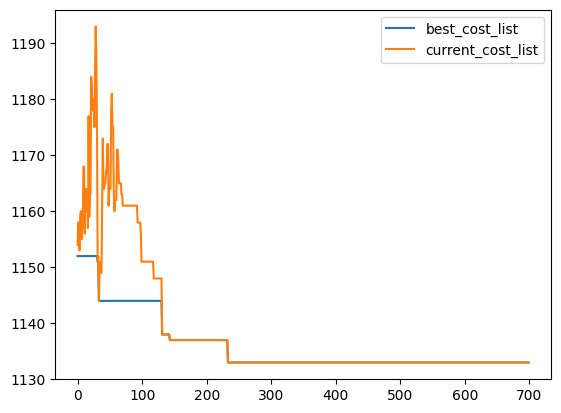

In [34]:
import matplotlib.pyplot as plt

x = range(num_iterations)
plt.plot(x, best_cost_list, label='best_cost_list')
plt.plot(x, current_cost_list, label='current_cost_list')
plt.legend()
plt.show()

Text(0.5, 1.0, 'initial solution, cost: 1170')

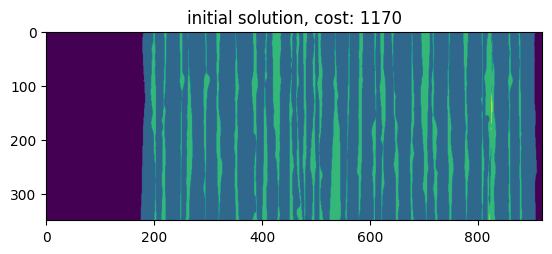

In [39]:
final_image = visualize_solution(imageset, [order_list, orientations_list,rotations_list])
plt.imshow(final_image[:,1000:])
plt.title('initial solution, cost: '+str(initial_cost))

In [40]:
final_image.shape

(350, 1920)

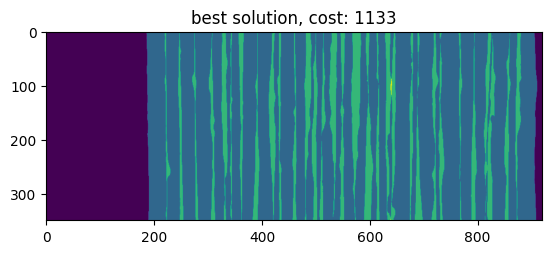

In [41]:
solution1 = best_solution
final_image = visualize_solution(imageset, solution1)
plt.title('best solution, cost: '+str(best_cost))
# current_axes.get_xaxis().set_visible(False)
# current_axes.get_yaxis().set_visible(False)
plt.imshow(final_image[:,1000:])
plt.savefig("b.png",format="png",dpi=300)

In [ ]:
#visualize_solution2(imageset, best_solution)

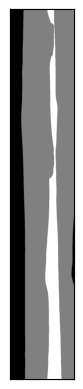

In [46]:
#solution1 = [[2, 3, 4, 5, 1, 0, 6, 7], [1, -1, 1, 1, 1, -1, -1, 1]]
for i in range(2):#len(solution1[0])-1
  m=str(i)
  log_id = idlist[int(solution1[0][i])]
   #image1_ = imageset[int(solution1[0][i])]
  image1 = imageset_highres[int(solution1[0][i])]
  image2 = imageset_highres[int(solution1[0][i+1])]

  if int(solution1[1][i]) == -1:
    image1 = cv2.flip(image1,0)

  if int(solution1[1][i+1]) == -1:
    image2 = cv2.flip(image2,0)

  if int(solution1[2][i]) == -1:
    image1 = cv2.rotate(image1,rotateCode=cv2.ROTATE_180)

  if int(solution1[2][i+1]) == -1:
    image2 = cv2.rotate(image2,rotateCode=cv2.ROTATE_180)

  addshift=3
  min_loss, optimum_shift, image_overlay1 = align_linear(image1, image2, addshift = addshift)
  image_for_export = (image_overlay1[:,optimum_shift+addshift:optimum_shift+addshift+image1.shape[1]])
  if int(solution1[1][i]) == -1:
    image_for_export = cv2.flip(image_for_export,-1)
  current_axes = plt.axes()
  current_axes.get_xaxis().set_visible(False)
  current_axes.get_yaxis().set_visible(False)
  plt.imshow(image_for_export,cmap="gray")
  # plt.savefig(m+"_solution.png")
  #cv2.imwrite(str(log_id)+'_solution.png', image_for_export*150)

In [45]:
import pandas as pd

# Create a dictionary with column names as keys and empty lists as values
data = {
    'NO': [],
    'flip_det': [],
    'rotate_det': [],
    'log_left': [],
    'log_right': []
}

# Populate the data dictionary from the solution list
for i in range(len(solution1[0])):
    data['NO'].append(idlist[int(solution1[0][i])] )
    data['flip_det'].append(solution1[1][i])

    left_index = (i - 1) % len(solution1[0])
    data['rotate_det'].append(solution1[2][i])

    left_index = (i - 1) % len(solution1[0])  # Wrap around to the end if i-1 goes out of range
    data['log_left'].append(idlist[solution1[0][left_index]])

    right_index = (i + 1) % len(solution1[0])  # Wrap around to the beginning if i+1 goes out of range
    data['log_right'].append(idlist[solution1[0][right_index]])

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)
df
#df.to_csv('dataframe_scan1.csv')

,NO,flip_det,rotate_det,log_left,log_right
0,13,-1,-1,10,16
1,16,1,1,13,5
2,5,1,1,16,7
3,7,1,-1,5,20
4,20,-1,-1,7,6
5,6,-1,1,20,21
6,21,-1,-1,6,23
7,23,1,1,21,14
8,14,1,1,23,28
9,28,-1,1,14,19
